In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [18]:
#frame = cv2.imread('image.jpg')
#plt.imshow(frame)

In [19]:
def unique(list1):
    # initialize a null list
    unique_list = []
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if str(x)[0:3] not in unique_list:
            unique_list.append(str(x)[0:3])
    # print list
    #print(unique_list)
    for x in unique_list:
        #print("New")
        for i in range(0,len(list1)):
            #print(list1[i])
            if str(x) in str(list1[i]):
                unique_list[i] = float(list1[i])
                break
    return unique_list
                

[1.7328244274809161, 3.288135593220339]
[60 53 68]
45


1920

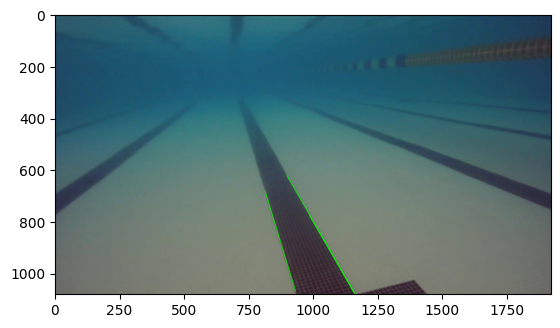

In [25]:
img = cv2.imread('rov_pool.jpg')

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 108, 109, apertureSize=3) # detect edges
lines = cv2.HoughLinesP(
                edges,
                1,
                np.pi/180,
                100,
                minLineLength=100,
                maxLineGap=30,
        ) # detect lines
slopes = []
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    slope = (y2-y1) / (x2-x1)
    slopes.append(slope)
print(unique(slopes))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
print(img[1000][1080])
lol = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(lol[1000][1000])
len(img[1000])

In [21]:
'''cap = cv2.VideoCapture('AUV_Vid.mkv')
counter = 0
ret = True
while ret:
    if counter % 150 == 0:
        ret, frame = cap.read()
        gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        edges = cv2.Canny(gray, 108, 109, apertureSize=3) # detect edges
        plt.imshow(edges)
        lines = cv2.HoughLinesP(
                        edges,
                        1,
                        np.pi/180,
                        100,
                        minLineLength=100,
                        maxLineGap=30,
                ) # detect lines
        try:
            for line in lines:
                x1, y1, x2, y2 = line[0]
                cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        except:
            pass
        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.show()
    counter += 1'''

"cap = cv2.VideoCapture('AUV_Vid.mkv')\ncounter = 0\nret = True\nwhile ret:\n    if counter % 150 == 0:\n        ret, frame = cap.read()\n        gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)\n        edges = cv2.Canny(gray, 108, 109, apertureSize=3) # detect edges\n        plt.imshow(edges)\n        lines = cv2.HoughLinesP(\n                        edges,\n                        1,\n                        np.pi/180,\n                        100,\n                        minLineLength=100,\n                        maxLineGap=30,\n                ) # detect lines\n        try:\n            for line in lines:\n                x1, y1, x2, y2 = line[0]\n                cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)\n        except:\n            pass\n        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))\n        plt.show()\n    counter += 1"

In [22]:
#Drawing Line
cv2.line(img, (0, 0), (100, 100), (255, 0, 0), 5)
#Drawing rectangle
cv2.rectangle(img, (0, 0), (100, 100), (0, 255, 0), 5)
#Drawing Circle
cv2.circle(img, (50, 50), 50, (0, 0, 255), 5)
#Drawing Polygon
pts = np.array([[10, 5], [20, 30], [70, 20], [50, 10]], np.int32)
pts = pts.reshape((-1, 1, 2))
cv2.polylines(img, [pts], True, (0, 255, 255), 5)
#Adding Text
cv2.putText(img, 'Hello World!', (0, 130), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [ 86,  55,  34],
        [ 86,  55,  34],
        [ 86,  55,  34]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [ 86,  55,  34],
        [ 86,  55,  34],
        [ 86,  55,  34]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [ 86,  55,  32],
        [ 86,  55,  34],
        [ 86,  55,  34]],

       ...,

       [[101, 107, 106],
        [100, 106, 105],
        [ 99, 105, 104],
        ...,
        [105, 104, 106],
        [105, 104, 106],
        [105, 104, 106]],

       [[ 99, 104, 103],
        [100, 105, 104],
        [102, 107, 106],
        ...,
        [105, 104, 106],
        [105, 104, 106],
        [105, 104, 106]],

       [[ 98, 103, 102],
        [100, 105, 104],
        [103, 108, 107],
        ...,
        [105, 104, 106],
        [105, 104, 106],
        [105, 104, 106]]

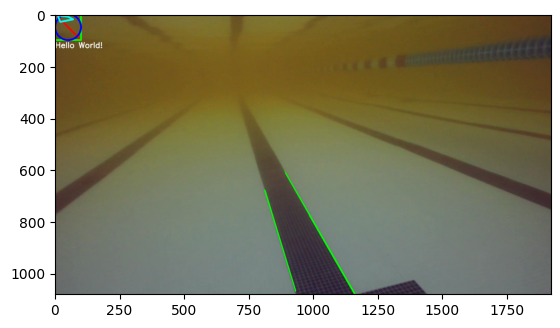

In [23]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
edges = cv2.Canny(gray, 50, 150, apertureSize=3) # detect edges
lines = cv2.HoughLinesP(
                edges,
                1,
                np.pi/180,
                100,
                minLineLength=100,
                maxLineGap=10,
        ) # detect lines

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(img)

[150.60402144  99.72759634]
Detection object:
tag_family = b'tag36h11'
tag_id = 60
hamming = 0
decision_margin = 24.732818603515625
homography = [[1.12852846e+01 1.35218628e+01 1.50604021e+02]
 [4.12931891e-01 1.34012105e+01 9.97275963e+01]
 [7.54358942e-03 3.97360209e-02 1.00000000e+00]]
center = [150.60402144  99.72759634]
corners = [[148.07374573 109.20044708]
 [167.49220276 108.4158783 ]
 [153.30262756  89.62454987]
 [132.03965759  90.17698669]]
pose_R = None
pose_t = None
pose_err = None

[466.62130564  82.02016819]
Detection object:
tag_family = b'tag36h11'
tag_id = 82
hamming = 0
decision_margin = 24.04063606262207
homography = [[ 8.02054019e+00  3.10314575e+00  4.66621306e+02]
 [-8.49221724e-01  1.06309763e+01  8.20201682e+01]
 [-3.96118917e-03  1.89261753e-02  1.00000000e+00]]
center = [466.62130564  82.02016819]
corners = [[451.37316895  91.40827179]
 [470.70095825  90.44836426]
 [482.58377075  72.19226074]
 [462.41769409  73.33588409]]
pose_R = None
pose_t = None
pose_err = 

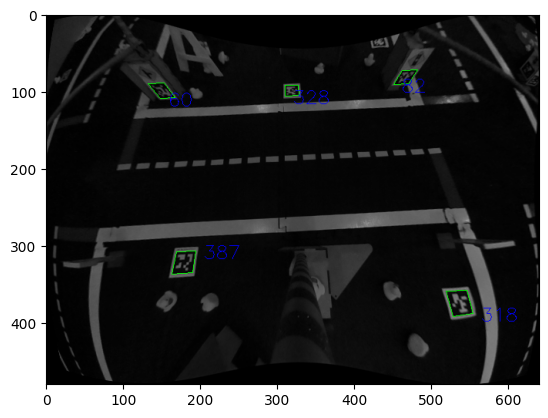

In [24]:
from dt_apriltags import Detector
img = cv2.imread('test_image.png', cv2.IMREAD_GRAYSCALE)
at_detector = Detector(families='tag36h11',
                       nthreads=1,
                       quad_decimate=1.0,
                       quad_sigma=0.0,
                       refine_edges=1,
                       decode_sharpening=0.25,
                       debug=0)
color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
tags = at_detector.detect(img, estimate_tag_pose=False, camera_params=None, tag_size=None)
for tag in tags:
    for idx in range(len(tag.corners)):
        cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0))
    cv2.putText(color_img, str(tag.tag_id),
                org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=0.8,
                color=(0, 0, 255))
    print(tag.center)
    print(tag)

plt.imshow(color_img)